In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_excel("/content/seasonal.xlsx")

In [0]:
weather_data.head(2)

,Year,Temperature,NDVI,Snow Cover
0,2001,272.6289,11208.58,6643.712500
1,2001,283.9209,13899.32,5613.083333


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
Year           69 non-null int64
Temperature    69 non-null float64
NDVI           69 non-null float64
Snow Cover     69 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.2 KB


In [0]:
input_feature= weather_data.iloc[:,[1,3]].values
input_data = input_feature

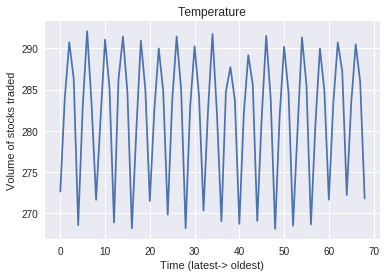

In [0]:
plt.plot(input_feature[:,0])
plt.title("Temperature")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

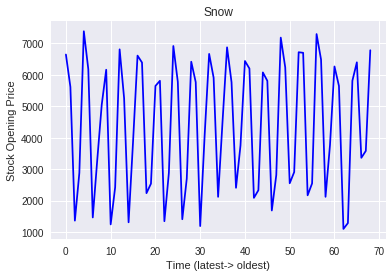

In [0]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Snow")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 21
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,1])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(48, 21, 2)
(20, 21, 2)


In [0]:
from keras import optimizers
from keras import Sequential
from keras.layers import Dense, LSTM


In [0]:
model = Sequential()
model.add(LSTM(units=110, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=110, return_sequences=True))
model.add(LSTM(units=110))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 21, 110)           49720     
_________________________________________________________________
lstm_8 (LSTM)                (None, 21, 110)           97240     
_________________________________________________________________
lstm_9 (LSTM)                (None, 110)               97240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 111       
Total params: 244,311
Trainable params: 244,311
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adamax', loss='mean_squared_error')


In [0]:
model.fit(X, y, epochs=100, batch_size=4)


Epoch 1/100
48/48 [==============================] - 6s 120ms/step - loss: 0.1816
Epoch 2/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1139
Epoch 3/100
48/48 [==============================] - 1s 24ms/step - loss: 0.1029
Epoch 4/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1181
Epoch 5/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1171
Epoch 6/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1114
Epoch 7/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1138
Epoch 8/100
48/48 [==============================] - 1s 24ms/step - loss: 0.1111
Epoch 9/100
48/48 [==============================] - 1s 24ms/step - loss: 0.1049
Epoch 10/100
48/48 [==============================] - 1s 24ms/step - loss: 0.1101
Epoch 11/100
48/48 [==============================] - 1s 24ms/step - loss: 0.1085
Epoch 12/100
48/48 [==============================] - 1s 25ms/step - loss: 0.1085
Epoch 13/100
48/48 [====

In [0]:
predicted_value= model.predict(X_test)


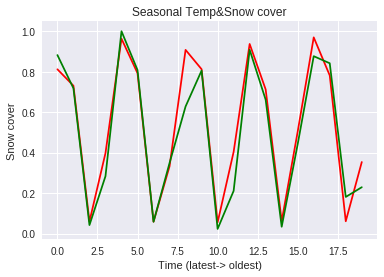

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:20,1], color='green')
plt.title("Seasonal Temp&Snow cover")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Snow cover")
plt.show()

In [0]:
print(input_data[:20,1])

[0.88220326 0.71822495 0.04179248 0.28337317 1.         0.80815334
 0.05806495 0.348669   0.62807736 0.80538668 0.02279136 0.21077265
 0.90848277 0.66140412 0.03350222 0.44211316 0.8767095  0.84166749
 0.18088477 0.2289778 ]


In [0]:
predicted_value

array([[0.8118627 ],
       [0.73062915],
       [0.05951636],
       [0.39744318],
       [0.9631863 ],
       [0.7926452 ],
       [0.05842061],
       [0.33239132],
       [0.9078516 ],
       [0.8122577 ],
       [0.05502224],
       [0.40358388],
       [0.9370385 ],
       [0.71234643],
       [0.0613298 ],
       [0.5041538 ],
       [0.9697392 ],
       [0.7815091 ],
       [0.06059502],
       [0.35343182]], dtype=float32)

In [0]:
rmse_test=np.sqrt(np.mean(np.power((np.array(input_data[:20,1])-np.array(predicted_value)),2)))

In [0]:
rmse_test

0.4783483723388139

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.r2_score(input_data[:20,1], predicted_value, sample_weight=None, multioutput='uniform_average')

0.9180359838327001

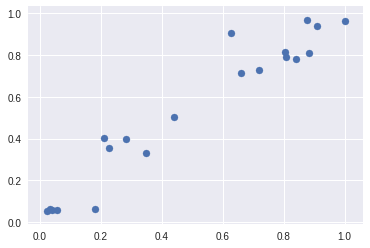

In [0]:
plt.scatter(input_data[:20,1],predicted_value)